In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df_lists = pd.DataFrame()
start_year= 2010
end_year = 2020

#scrapes data from hockeyreference.com
for year in range (start_year,end_year+1):
    k=1

    # 2005 was the lockout so there is no data to be scraped
    if year == 2005:
        print("2005 was the lockout")

    else:
        url = r'https://www.hockey-reference.com/leagues/NHL_' + str(year) + r'_games.html' 

        df_temp_reg = pd.DataFrame(pd.read_html(url)[0])
        df_temp_reg['season'] = year

    # use commented out code if playoff data is desired

        try:
            df_temp_post = pd.DataFrame(pd.read_html(url)[1])
            df_temp_post['season'] = year

        except IndexError as e:
            k = 0
            print('no playoffs available yet')
        
        print (str(year) + " scraped")

    df_lists = df_lists.append(df_temp_reg)

    if k == 1:
        df_lists.append(df_temp_post)

2010 scraped
2011 scraped
2012 scraped
2013 scraped
2014 scraped
2015 scraped
2016 scraped
2017 scraped
2018 scraped
2019 scraped
no playoffs available yet
2020 scraped


In [3]:
df_lists.columns

Index(['Date', 'Visitor', 'G', 'Home', 'G.1', 'Unnamed: 5', 'Att.', 'LOG',
       'Notes', 'season'],
      dtype='object')

In [4]:
df_lists.tail()

,Date,Visitor,G,Home,G.1,Unnamed: 5,Att.,LOG,Notes,season
1266,2020-04-04,Chicago Blackhawks,NaN,New York Rangers,NaN,NaN,NaN,NaN,NaN,2020
1267,2020-04-04,Pittsburgh Penguins,NaN,Ottawa Senators,NaN,NaN,NaN,NaN,NaN,2020
1268,2020-04-04,Anaheim Ducks,NaN,San Jose Sharks,NaN,NaN,NaN,NaN,NaN,2020
1269,2020-04-04,Montreal Canadiens,NaN,Toronto Maple Leafs,NaN,NaN,NaN,NaN,NaN,2020
1270,2020-04-04,Vegas Golden Knights,NaN,Vancouver Canucks,NaN,NaN,NaN,NaN,NaN,2020


In [5]:
df_lists.shape

(13147, 10)

In [6]:
df_lists['Home'].unique()

array(['Boston Bruins', 'Calgary Flames', 'Colorado Avalanche',
       'Toronto Maple Leafs', 'Carolina Hurricanes', 'Chicago Blackhawks',
       'Detroit Red Wings', 'Pittsburgh Penguins', 'Anaheim Ducks',
       'Atlanta Thrashers', 'Buffalo Sabres', 'Columbus Blue Jackets',
       'Dallas Stars', 'Edmonton Oilers', 'Florida Panthers',
       'Los Angeles Kings', 'New Jersey Devils', 'New York Islanders',
       'New York Rangers', 'St. Louis Blues', 'Washington Capitals',
       'Vancouver Canucks', 'Minnesota Wild', 'Philadelphia Flyers',
       'Nashville Predators', 'Ottawa Senators', 'San Jose Sharks',
       'Tampa Bay Lightning', 'Phoenix Coyotes', 'Montreal Canadiens',
       'Winnipeg Jets', 'Arizona Coyotes', 'Vegas Golden Knights'],
      dtype=object)

In [7]:
df_lists.head()

,Date,Visitor,G,Home,G.1,Unnamed: 5,Att.,LOG,Notes,season
0,2009-10-01,Washington Capitals,4.0,Boston Bruins,1.0,NaN,17565.0,NaN,NaN,2010
1,2009-10-01,Vancouver Canucks,3.0,Calgary Flames,5.0,NaN,19289.0,NaN,NaN,2010
2,2009-10-01,San Jose Sharks,2.0,Colorado Avalanche,5.0,NaN,18007.0,NaN,NaN,2010
3,2009-10-01,Montreal Canadiens,4.0,Toronto Maple Leafs,3.0,OT,19617.0,NaN,NaN,2010
4,2009-10-02,Philadelphia Flyers,2.0,Carolina Hurricanes,0.0,NaN,18680.0,NaN,NaN,2010


In [8]:
df_lists.rename(columns={'G':'VisitingGoals',
                       'G.1':'HomeGoals',
                       'Unnamed: 5':'OTSO',
                       }, inplace = True)
df_lists.head()

,Date,Visitor,VisitingGoals,Home,HomeGoals,OTSO,Att.,LOG,Notes,season
0,2009-10-01,Washington Capitals,4.0,Boston Bruins,1.0,NaN,17565.0,NaN,NaN,2010
1,2009-10-01,Vancouver Canucks,3.0,Calgary Flames,5.0,NaN,19289.0,NaN,NaN,2010
2,2009-10-01,San Jose Sharks,2.0,Colorado Avalanche,5.0,NaN,18007.0,NaN,NaN,2010
3,2009-10-01,Montreal Canadiens,4.0,Toronto Maple Leafs,3.0,OT,19617.0,NaN,NaN,2010
4,2009-10-02,Philadelphia Flyers,2.0,Carolina Hurricanes,0.0,NaN,18680.0,NaN,NaN,2010


In [9]:
df_lists.dtypes

Date              object
Visitor           object
VisitingGoals    float64
Home              object
HomeGoals        float64
OTSO              object
Att.             float64
LOG               object
Notes             object
season             int64
dtype: object

In [10]:
df_lists.drop(['Att.','LOG','Notes'], axis = 1, inplace=True)

In [11]:
df_lists.head()

,Date,Visitor,VisitingGoals,Home,HomeGoals,OTSO,season
0,2009-10-01,Washington Capitals,4.0,Boston Bruins,1.0,NaN,2010
1,2009-10-01,Vancouver Canucks,3.0,Calgary Flames,5.0,NaN,2010
2,2009-10-01,San Jose Sharks,2.0,Colorado Avalanche,5.0,NaN,2010
3,2009-10-01,Montreal Canadiens,4.0,Toronto Maple Leafs,3.0,OT,2010
4,2009-10-02,Philadelphia Flyers,2.0,Carolina Hurricanes,0.0,NaN,2010


In [12]:
df_lists.dtypes

Date              object
Visitor           object
VisitingGoals    float64
Home              object
HomeGoals        float64
OTSO              object
season             int64
dtype: object

In [13]:
df_lists.loc[:,'Date'] = pd.to_datetime(df_lists['Date'])

In [14]:
df_lists.dtypes

Date             datetime64[ns]
Visitor                  object
VisitingGoals           float64
Home                     object
HomeGoals               float64
OTSO                     object
season                    int64
dtype: object

In [15]:
df_lists['OTSO'].unique()

array([nan, 'OT', 'SO'], dtype=object)

In [16]:
df_lists['Home'].unique()

array(['Boston Bruins', 'Calgary Flames', 'Colorado Avalanche',
       'Toronto Maple Leafs', 'Carolina Hurricanes', 'Chicago Blackhawks',
       'Detroit Red Wings', 'Pittsburgh Penguins', 'Anaheim Ducks',
       'Atlanta Thrashers', 'Buffalo Sabres', 'Columbus Blue Jackets',
       'Dallas Stars', 'Edmonton Oilers', 'Florida Panthers',
       'Los Angeles Kings', 'New Jersey Devils', 'New York Islanders',
       'New York Rangers', 'St. Louis Blues', 'Washington Capitals',
       'Vancouver Canucks', 'Minnesota Wild', 'Philadelphia Flyers',
       'Nashville Predators', 'Ottawa Senators', 'San Jose Sharks',
       'Tampa Bay Lightning', 'Phoenix Coyotes', 'Montreal Canadiens',
       'Winnipeg Jets', 'Arizona Coyotes', 'Vegas Golden Knights'],
      dtype=object)

In [17]:
replace_dict= {'Home':{'Atlanta Thrashers': 'Winnipeg Jets',
                      'Mighty Ducks of Anaheim': 'Anaheim Ducks',
                      'Phoenix Coyotes': 'Arizona Coyotes'},
              'Visitor':{'Atlanta Thrashers': 'Winnipeg Jets',
                      'Mighty Ducks of Anaheim': 'Anaheim Ducks',
                      'Phoenix Coyotes': 'Arizona Coyotes'}}

In [18]:
df_lists.replace(replace_dict,inplace=True)

In [19]:
df_lists['Home'].unique()

array(['Boston Bruins', 'Calgary Flames', 'Colorado Avalanche',
       'Toronto Maple Leafs', 'Carolina Hurricanes', 'Chicago Blackhawks',
       'Detroit Red Wings', 'Pittsburgh Penguins', 'Anaheim Ducks',
       'Winnipeg Jets', 'Buffalo Sabres', 'Columbus Blue Jackets',
       'Dallas Stars', 'Edmonton Oilers', 'Florida Panthers',
       'Los Angeles Kings', 'New Jersey Devils', 'New York Islanders',
       'New York Rangers', 'St. Louis Blues', 'Washington Capitals',
       'Vancouver Canucks', 'Minnesota Wild', 'Philadelphia Flyers',
       'Nashville Predators', 'Ottawa Senators', 'San Jose Sharks',
       'Tampa Bay Lightning', 'Arizona Coyotes', 'Montreal Canadiens',
       'Vegas Golden Knights'], dtype=object)

In [20]:
df_lists.head()

,Date,Visitor,VisitingGoals,Home,HomeGoals,OTSO,season
0,2009-10-01,Washington Capitals,4.0,Boston Bruins,1.0,NaN,2010
1,2009-10-01,Vancouver Canucks,3.0,Calgary Flames,5.0,NaN,2010
2,2009-10-01,San Jose Sharks,2.0,Colorado Avalanche,5.0,NaN,2010
3,2009-10-01,Montreal Canadiens,4.0,Toronto Maple Leafs,3.0,OT,2010
4,2009-10-02,Philadelphia Flyers,2.0,Carolina Hurricanes,0.0,NaN,2010


In [21]:
ind = df_lists['OTSO'].isna()
df_lists.loc[ind,'OTSO'] = 'REG'

In [22]:
df_lists['OTSO'].unique()

array(['REG', 'OT', 'SO'], dtype=object)

In [23]:
# how come this doesnt work??? teams = df_lists['Home'].unique().sort()
teams = df_lists['Home'].unique()
teams.sort()
teams

array(['Anaheim Ducks', 'Arizona Coyotes', 'Boston Bruins',
       'Buffalo Sabres', 'Calgary Flames', 'Carolina Hurricanes',
       'Chicago Blackhawks', 'Colorado Avalanche',
       'Columbus Blue Jackets', 'Dallas Stars', 'Detroit Red Wings',
       'Edmonton Oilers', 'Florida Panthers', 'Los Angeles Kings',
       'Minnesota Wild', 'Montreal Canadiens', 'Nashville Predators',
       'New Jersey Devils', 'New York Islanders', 'New York Rangers',
       'Ottawa Senators', 'Philadelphia Flyers', 'Pittsburgh Penguins',
       'San Jose Sharks', 'St. Louis Blues', 'Tampa Bay Lightning',
       'Toronto Maple Leafs', 'Vancouver Canucks', 'Vegas Golden Knights',
       'Washington Capitals', 'Winnipeg Jets'], dtype=object)

In [24]:
df_lists.head()

,Date,Visitor,VisitingGoals,Home,HomeGoals,OTSO,season
0,2009-10-01,Washington Capitals,4.0,Boston Bruins,1.0,REG,2010
1,2009-10-01,Vancouver Canucks,3.0,Calgary Flames,5.0,REG,2010
2,2009-10-01,San Jose Sharks,2.0,Colorado Avalanche,5.0,REG,2010
3,2009-10-01,Montreal Canadiens,4.0,Toronto Maple Leafs,3.0,OT,2010
4,2009-10-02,Philadelphia Flyers,2.0,Carolina Hurricanes,0.0,REG,2010


In [25]:
team_elos = {}
for team in teams:
    team_elos[team] = 1500
team_elos

{'Anaheim Ducks': 1500,
 'Arizona Coyotes': 1500,
 'Boston Bruins': 1500,
 'Buffalo Sabres': 1500,
 'Calgary Flames': 1500,
 'Carolina Hurricanes': 1500,
 'Chicago Blackhawks': 1500,
 'Colorado Avalanche': 1500,
 'Columbus Blue Jackets': 1500,
 'Dallas Stars': 1500,
 'Detroit Red Wings': 1500,
 'Edmonton Oilers': 1500,
 'Florida Panthers': 1500,
 'Los Angeles Kings': 1500,
 'Minnesota Wild': 1500,
 'Montreal Canadiens': 1500,
 'Nashville Predators': 1500,
 'New Jersey Devils': 1500,
 'New York Islanders': 1500,
 'New York Rangers': 1500,
 'Ottawa Senators': 1500,
 'Philadelphia Flyers': 1500,
 'Pittsburgh Penguins': 1500,
 'San Jose Sharks': 1500,
 'St. Louis Blues': 1500,
 'Tampa Bay Lightning': 1500,
 'Toronto Maple Leafs': 1500,
 'Vancouver Canucks': 1500,
 'Vegas Golden Knights': 1500,
 'Washington Capitals': 1500,
 'Winnipeg Jets': 1500}

In [26]:
k_factor = 10
def update_elo(w_elo, l_elo):
    exp_win = expected_result(w_elo, l_elo)
    change = k_factor * (1-exp_win)
    w_elo = w_elo + change
    l_elo = l_elo - change
    return w_elo, l_elo

def expected_result(elo_a, elo_b):
    expect = 1.0/(1+10**((elo_b - elo_a)/400))
    return expect

In [27]:
#for row in df_lists.loc[1,:].itertuples():
    #print(row)

row = df_lists.loc[1,:]
print(row)
    

        Date              Visitor  VisitingGoals                 Home  \
1 2009-10-01    Vancouver Canucks            3.0       Calgary Flames   
1 2010-10-07       Calgary Flames            0.0      Edmonton Oilers   
1 2011-10-06   Montreal Canadiens            0.0  Toronto Maple Leafs   
1 2013-01-19      Arizona Coyotes            3.0         Dallas Stars   
1 2013-10-01        Winnipeg Jets            5.0      Edmonton Oilers   
1 2014-10-08    Vancouver Canucks            4.0       Calgary Flames   
1 2015-10-07     New York Rangers            3.0   Chicago Blackhawks   
1 2016-10-12       Calgary Flames            4.0      Edmonton Oilers   
1 2017-10-04      St. Louis Blues            5.0  Pittsburgh Penguins   
1 2018-10-03   Montreal Canadiens            2.0  Toronto Maple Leafs   
1 2019-10-02  Washington Capitals            NaN      St. Louis Blues   

   HomeGoals OTSO  season  
1        5.0  REG    2010  
1        4.0  REG    2011  
1        2.0  REG    2012  
1        4.

In [28]:
games = df_lists.reset_index() 

In [29]:
games.loc[1,:]

index                              1
Date             2009-10-01 00:00:00
Visitor            Vancouver Canucks
VisitingGoals                      3
Home                  Calgary Flames
HomeGoals                          5
OTSO                             REG
season                          2010
Name: 1, dtype: object

In [30]:
games.head()

,index,Date,Visitor,VisitingGoals,Home,HomeGoals,OTSO,season
0,0,2009-10-01,Washington Capitals,4.0,Boston Bruins,1.0,REG,2010
1,1,2009-10-01,Vancouver Canucks,3.0,Calgary Flames,5.0,REG,2010
2,2,2009-10-01,San Jose Sharks,2.0,Colorado Avalanche,5.0,REG,2010
3,3,2009-10-01,Montreal Canadiens,4.0,Toronto Maple Leafs,3.0,OT,2010
4,4,2009-10-02,Philadelphia Flyers,2.0,Carolina Hurricanes,0.0,REG,2010


In [31]:
games.drop('index', axis=1, inplace=True)

In [32]:
games.head()

,Date,Visitor,VisitingGoals,Home,HomeGoals,OTSO,season
0,2009-10-01,Washington Capitals,4.0,Boston Bruins,1.0,REG,2010
1,2009-10-01,Vancouver Canucks,3.0,Calgary Flames,5.0,REG,2010
2,2009-10-01,San Jose Sharks,2.0,Colorado Avalanche,5.0,REG,2010
3,2009-10-01,Montreal Canadiens,4.0,Toronto Maple Leafs,3.0,OT,2010
4,2009-10-02,Philadelphia Flyers,2.0,Carolina Hurricanes,0.0,REG,2010


In [33]:
games.rename(columns={'season':'Season'}, inplace = True)

In [34]:
games.tail()

,Date,Visitor,VisitingGoals,Home,HomeGoals,OTSO,Season
13142,2020-04-04,Chicago Blackhawks,NaN,New York Rangers,NaN,REG,2020
13143,2020-04-04,Pittsburgh Penguins,NaN,Ottawa Senators,NaN,REG,2020
13144,2020-04-04,Anaheim Ducks,NaN,San Jose Sharks,NaN,REG,2020
13145,2020-04-04,Montreal Canadiens,NaN,Toronto Maple Leafs,NaN,REG,2020
13146,2020-04-04,Vegas Golden Knights,NaN,Vancouver Canucks,NaN,REG,2020


In [35]:
for row in games.head().itertuples():
    print(row)

Pandas(Index=0, Date=Timestamp('2009-10-01 00:00:00'), Visitor='Washington Capitals', VisitingGoals=4.0, Home='Boston Bruins', HomeGoals=1.0, OTSO='REG', Season=2010)
Pandas(Index=1, Date=Timestamp('2009-10-01 00:00:00'), Visitor='Vancouver Canucks', VisitingGoals=3.0, Home='Calgary Flames', HomeGoals=5.0, OTSO='REG', Season=2010)
Pandas(Index=2, Date=Timestamp('2009-10-01 00:00:00'), Visitor='San Jose Sharks', VisitingGoals=2.0, Home='Colorado Avalanche', HomeGoals=5.0, OTSO='REG', Season=2010)
Pandas(Index=3, Date=Timestamp('2009-10-01 00:00:00'), Visitor='Montreal Canadiens', VisitingGoals=4.0, Home='Toronto Maple Leafs', HomeGoals=3.0, OTSO='OT', Season=2010)
Pandas(Index=4, Date=Timestamp('2009-10-02 00:00:00'), Visitor='Philadelphia Flyers', VisitingGoals=2.0, Home='Carolina Hurricanes', HomeGoals=0.0, OTSO='REG', Season=2010)


In [36]:
class TeamElos(dict):
    def __init__(self):
        super().__init__(self)
        for team in teams:
            self[team] = 1500
            
    def update(self, game_tuple):
        if game_tuple.VisitingGoals>game_tuple.HomeGoals:
            winning_team = game_tuple.Visitor
            losing_team = game_tuple.Home
        else:
            winning_team = game_tuple.Home
            losing_team = game_tuple.Visitor
        self[winning_team], self[losing_team] = update_elo(self[winning_team],self[losing_team])
            

In [37]:
elos = TeamElos()
for row in games.itertuples():
    if row.Date.date()< pd.Timestamp.today().date():
        elos.update(row)

In [38]:
games.dtypes

Date             datetime64[ns]
Visitor                  object
VisitingGoals           float64
Home                     object
HomeGoals               float64
OTSO                     object
Season                    int64
dtype: object

In [39]:
elos=pd.DataFrame(elos, index = ['Elo Rating']).T.sort_values(by='Elo Rating', ascending = False)

In [40]:
ind = games['Date']> pd.Timestamp('today')

In [41]:
games_future = games.loc[ind,:].reset_index()
games_future.drop('index', axis=1, inplace=True)

In [42]:
games_future.head()


,Date,Visitor,VisitingGoals,Home,HomeGoals,OTSO,Season
0,2019-10-02,Vancouver Canucks,NaN,Edmonton Oilers,NaN,REG,2020
1,2019-10-02,Washington Capitals,NaN,St. Louis Blues,NaN,REG,2020
2,2019-10-02,Ottawa Senators,NaN,Toronto Maple Leafs,NaN,REG,2020
3,2019-10-02,San Jose Sharks,NaN,Vegas Golden Knights,NaN,REG,2020
4,2019-10-03,Arizona Coyotes,NaN,Anaheim Ducks,NaN,REG,2020


In [43]:
games_prediction = games_future.loc[0:10,['Date', 'Visitor', 'Home']]

In [44]:
elos.head()

,Elo Rating
Tampa Bay Lightning,1654.526896
Washington Capitals,1574.969030
Boston Bruins,1573.449994
Nashville Predators,1556.701386
Columbus Blue Jackets,1549.891957


In [45]:
games_prediction.head()

,Date,Visitor,Home
0,2019-10-02,Vancouver Canucks,Edmonton Oilers
1,2019-10-02,Washington Capitals,St. Louis Blues
2,2019-10-02,Ottawa Senators,Toronto Maple Leafs
3,2019-10-02,San Jose Sharks,Vegas Golden Knights
4,2019-10-03,Arizona Coyotes,Anaheim Ducks


In [46]:
games_prediction = pd.DataFrame.merge(games_prediction,elos,left_on= 'Visitor', right_index = True)
games_prediction.rename(columns={'Elo Rating':'Visitor Elo Rating'
                       }, inplace = True)
games_prediction.head()

,Date,Visitor,Home,Visitor Elo Rating
0,2019-10-02,Vancouver Canucks,Edmonton Oilers,1433.398625
1,2019-10-02,Washington Capitals,St. Louis Blues,1574.969030
2,2019-10-02,Ottawa Senators,Toronto Maple Leafs,1401.631455
3,2019-10-02,San Jose Sharks,Vegas Golden Knights,1536.326902
4,2019-10-03,Arizona Coyotes,Anaheim Ducks,1467.192211


In [47]:
games_prediction = pd.DataFrame.merge(games_prediction,elos,left_on= 'Home', right_index = True)
games_prediction.rename(columns={'Elo Rating':'Home Elo Rating'
                       }, inplace = True)

In [48]:
games_prediction.head()

,Date,Visitor,Home,Visitor Elo Rating,Home Elo Rating
0,2019-10-02,Vancouver Canucks,Edmonton Oilers,1433.398625,1448.834186
1,2019-10-02,Washington Capitals,St. Louis Blues,1574.969030,1548.674850
2,2019-10-02,Ottawa Senators,Toronto Maple Leafs,1401.631455,1521.389410
3,2019-10-02,San Jose Sharks,Vegas Golden Knights,1536.326902,1518.673651
4,2019-10-03,Arizona Coyotes,Anaheim Ducks,1467.192211,1483.145589


In [49]:
games_prediction['Home Win%']= expected_result(games_prediction['Home Elo Rating'],games_prediction['Visitor Elo Rating'])

In [50]:
games_prediction.head()

,Date,Visitor,Home,Visitor Elo Rating,Home Elo Rating,Home Win%
0,2019-10-02,Vancouver Canucks,Edmonton Oilers,1433.398625,1448.834186,0.522199
1,2019-10-02,Washington Capitals,St. Louis Blues,1574.969030,1548.674850,0.462232
2,2019-10-02,Ottawa Senators,Toronto Maple Leafs,1401.631455,1521.389410,0.665829
3,2019-10-02,San Jose Sharks,Vegas Golden Knights,1536.326902,1518.673651,0.474617
4,2019-10-03,Arizona Coyotes,Anaheim Ducks,1467.192211,1483.145589,0.522943


In [51]:
games_prediction['Visitor Win%'] = 1-games_prediction['Home Win%']

In [52]:
games_prediction.head()

,Date,Visitor,Home,Visitor Elo Rating,Home Elo Rating,Home Win%,Visitor Win%
0,2019-10-02,Vancouver Canucks,Edmonton Oilers,1433.398625,1448.834186,0.522199,0.477801
1,2019-10-02,Washington Capitals,St. Louis Blues,1574.969030,1548.674850,0.462232,0.537768
2,2019-10-02,Ottawa Senators,Toronto Maple Leafs,1401.631455,1521.389410,0.665829,0.334171
3,2019-10-02,San Jose Sharks,Vegas Golden Knights,1536.326902,1518.673651,0.474617,0.525383
4,2019-10-03,Arizona Coyotes,Anaheim Ducks,1467.192211,1483.145589,0.522943,0.477057


In [53]:
games_prediction.drop(['Visitor Elo Rating','Home Elo Rating'], axis = 1, inplace=True)

In [54]:
games_prediction = games_prediction[['Date', 'Visitor', 'Visitor Win%','Home','Home Win%']]

In [55]:
games_prediction

,Date,Visitor,Visitor Win%,Home,Home Win%
0,2019-10-02,Vancouver Canucks,0.477801,Edmonton Oilers,0.522199
1,2019-10-02,Washington Capitals,0.537768,St. Louis Blues,0.462232
2,2019-10-02,Ottawa Senators,0.334171,Toronto Maple Leafs,0.665829
3,2019-10-02,San Jose Sharks,0.525383,Vegas Golden Knights,0.474617
4,2019-10-03,Arizona Coyotes,0.477057,Anaheim Ducks,0.522943
5,2019-10-03,Montreal Canadiens,0.453278,Carolina Hurricanes,0.546722
6,2019-10-03,Calgary Flames,0.584290,Colorado Avalanche,0.415710
7,2019-10-03,Boston Bruins,0.584372,Dallas Stars,0.415628
8,2019-10-03,Minnesota Wild,0.392045,Nashville Predators,0.607955
9,2019-10-03,Winnipeg Jets,0.670131,New York Rangers,0.329869


In [56]:
class TeamElos(dict):
    def __init__(self,teams):
        super().__init__(self)
        for team in teams:
            self[team] = 1500
        self.history = HistoryList(teams)

    def update(self, game_tuple):
        if game_tuple.VisitingGoals > game_tuple.HomeGoals:
            winning_team = game_tuple.Visitor
            losing_team = game_tuple.Home
        else:
            winning_team = game_tuple.Home
            losing_team = game_tuple.Visitor
        self[winning_team], self[losing_team] = update_elo(
            self[winning_team],
            self[losing_team])
        self.history.update(
            winning_team = winning_team,
            losing_team = losing_team,
            win_elo = self[winning_team],
            lose_elo = self[losing_team],
            date = game_tuple.Date
            )


class HistoryList(dict):
    def __init__(self, teams):
        super().__init__(self)
        for team in teams:
            self[team] = pd.DataFrame(columns = ['Date', 'Elo Rating'])

    def update(self, winning_team, losing_team, win_elo, lose_elo, date):
        self[winning_team] = self[winning_team].append({'Date': date,'Elo Rating': win_elo}, ignore_index = True)
        self[losing_team]= self[losing_team].append({'Date': date,'Elo Rating': lose_elo}, ignore_index = True)


elos = TeamElos(teams)
for row in games.itertuples():
    if row.Date.date() < pd.Timestamp.today().date():
        elos.update(row)

print(elos.history['Toronto Maple Leafs'])


          Date   Elo Rating
0   2009-10-01  1495.000000
1   2009-10-03  1490.143872
2   2009-10-06  1485.212717
3   2009-10-10  1480.568860
4   2009-10-12  1476.060727
5   2009-10-13  1471.471198
6   2009-10-17  1467.225651
7   2009-10-24  1462.640051
8   2009-10-26  1467.968267
9   2009-10-28  1463.373857
10  2009-10-30  1459.240126
11  2009-10-31  1454.762293
12  2009-11-03  1450.157516
13  2009-11-06  1455.194347
14  2009-11-07  1460.874827
15  2009-11-10  1456.205054
16  2009-11-13  1452.028734
17  2009-11-14  1448.031073
18  2009-11-17  1443.680444
19  2009-11-19  1438.574509
20  2009-11-21  1444.680857
21  2009-11-23  1440.067551
22  2009-11-25  1445.742114
23  2009-11-27  1451.373237
24  2009-11-30  1447.324491
25  2009-12-01  1452.950971
26  2009-12-03  1458.529390
27  2009-12-05  1454.151243
28  2009-12-07  1460.032699
29  2009-12-09  1465.165873
..         ...          ...
756 2019-02-06  1561.323880
757 2019-02-09  1565.387408
758 2019-02-10  1558.806140
759 2019-02-12  1562

In [57]:
import numpy as np
import matplotlib.pyplot as plt

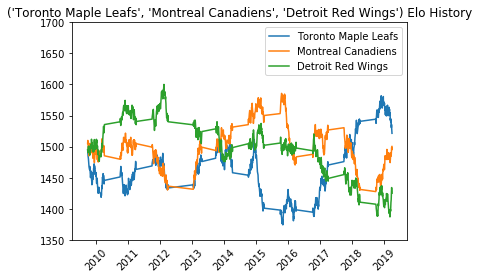

In [62]:
def plot_history(*args):      
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim([1350,1700])
    plt.xticks(rotation=45)
    
    for team in args:
        cax = plt.plot(elos.history[team]['Date'],
                elos.history[team]['Elo Rating'],
                      label = team)
        
    plt.title(f'{args} Elo History')
    plt.legend()
    

plot_history('Toronto Maple Leafs', 'Montreal Canadiens','Detroit Red Wings')
    

In [59]:
def print_args(*args):
    print(args)
    
print_args('Toronto',"montreal",'Canada')

('Toronto', 'montreal', 'Canada')
